# Air Traffic

The dataset contains statistical reports monthly flights in
San Francisco International Airport by airline flight

## Preprocessing

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
import plotly.graph_objects as go

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [543]:
df = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/air_traffic_data.csv', encoding='latin-1')
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [544]:
df.duplicated().sum()

0

In [545]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

Because it was quite small, I did a search for data that had missing values

In [546]:
display(df[df.isna().any(axis=1)])

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August
6814,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
6925,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160,Deplaned,160,2010,June
6926,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160,Enplaned,160,2010,June
7173,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March


As can be seen, the missing data is the code for an airline (but the full name of the airline is there). So to handle this we did research on the internet for the correct IATA code for that airline.

The following are the names of airlines that have missing values in the IATA code, and how we handle them:
* Boeing Company -> OTHERS (Because on the internet it turns out there is no airline with the name Boeing Company)
* Pacific Aviation -> BL
* Swissport USA -> SWS (Because it turns out the Swissport company is not an airline, but operates in airport ground services)
* Servisair -> SGH

In [547]:
df[df['Operating Airline'] == 'Servisair'] = df[df['Operating Airline'] == 'Servisair'].replace(to_replace = np.nan, value = 'SGH')
df[df['Operating Airline'] == 'Pacific Aviation'] = df[df['Operating Airline'] == 'Pacific Aviation'].replace(to_replace = np.nan, value = 'BL')
df[df['Operating Airline'] == 'Swissport USA'] = df[df['Operating Airline'] == 'Swissport USA'].replace(to_replace = np.nan, value = 'SWS')
df[df['Operating Airline'] == 'Boeing Company'] = df[df['Operating Airline'] == 'Boeing Company'].replace(to_replace = np.nan, value = 'BC')

In [548]:
df[(df['Operating Airline'] == 'Servisair') | (df['Operating Airline'] == 'Pacific Aviation') | (df['Operating Airline'] == 'Boeing Company') | (df['Operating Airline'] == 'Servisair')]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,200508,Boeing Company,BC,Boeing Company,BC,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August
6814,201005,Servisair,SGH,Servisair,SGH,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,201005,Servisair,SGH,Servisair,SGH,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
6925,201006,Pacific Aviation,BL,Pacific Aviation,BL,International,Europe,Deplaned,Other,International,A,160,Deplaned,160,2010,June
6926,201006,Pacific Aviation,BL,Pacific Aviation,BL,International,Europe,Enplaned,Other,International,A,160,Enplaned,160,2010,June
7173,201008,Servisair,SGH,Servisair,SGH,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,201008,Servisair,SGH,Servisair,SGH,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,201101,Servisair,SGH,Servisair,SGH,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,201101,Servisair,SGH,Servisair,SGH,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,201103,Servisair,SGH,Servisair,SGH,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March


In [549]:
top = df["Operating Airline IATA Code"].mode()[0]
df["Operating Airline IATA Code"].fillna(top, inplace=True)

top = df["Published Airline IATA Code"].mode()[0]
df["Published Airline IATA Code"].fillna(top, inplace=True)
print(df.isnull().sum())

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64


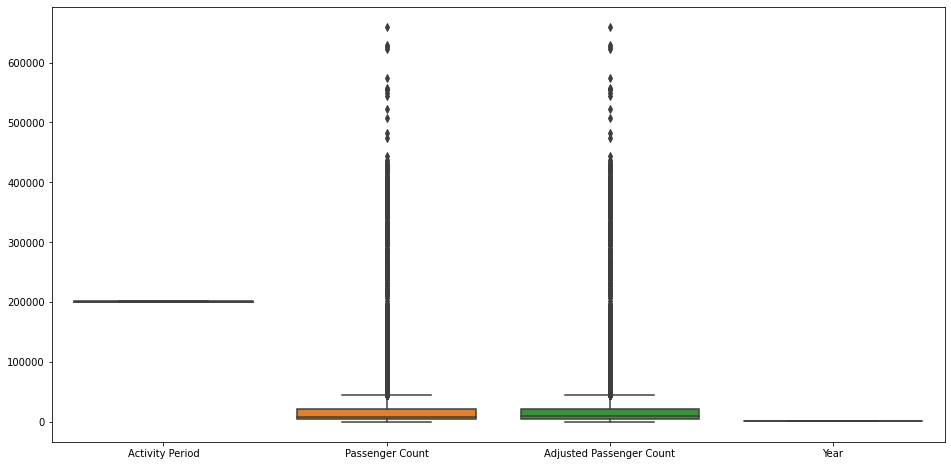

In [550]:
plt.figure(figsize=[16,8])
sns.boxplot(data = df)
plt.show()

In [551]:
print("Ukuran data sebelum menghapus outlier:", df.shape)

for cols in df.columns:
  if cols == "Passenger Count" or cols =="Adjusted Passenger Count" or cols == "Year":
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df.drop(df[df[cols] < Q1 - 1.5*IQR].index, inplace = True) 
    df.drop(df[df[cols] > Q3 + 1.5*IQR].index, inplace = True) 

print("Ukuran data setelah menghapus outlier:", df.shape)

Ukuran data sebelum menghapus outlier: (15007, 16)
Ukuran data setelah menghapus outlier: (11736, 16)


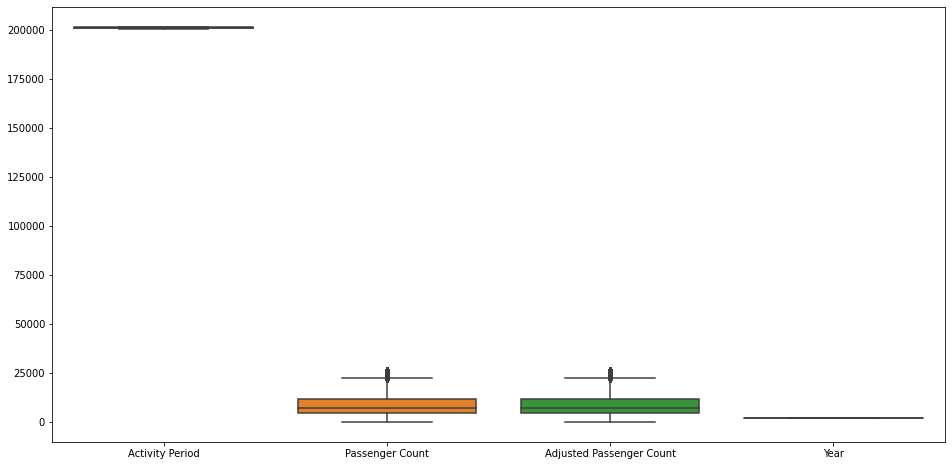

In [552]:
plt.figure(figsize=[16,8])
sns.boxplot(data = df)
plt.show()

In [553]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,201603,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,17521,Enplaned,17521,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [554]:
df.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,11736.000000,11736.000000,11736.000000,11736.000000
mean,201042.237900,8553.142468,8668.683623,2010.357021
std,313.117624,5902.682436,5862.421130,3.135433
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,4471.750000,4628.250000,2008.000000
50%,201010.000000,7230.500000,7321.000000,2010.000000
75%,201307.000000,11627.750000,11749.500000,2013.000000
max,201603.000000,26203.000000,26203.000000,2016.000000


In [555]:
df.describe(exclude=np.number)

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Month
count,11736,11736,11736,11736,11736,11736,11736,11736,11736,11736,11736,11736
unique,76,76,68,68,2,9,3,2,5,8,3,12
top,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Asia,Deplaned,Other,International,A,Deplaned,September
freq,1523,1960,1798,2362,8746,3015,5437,10537,8405,4921,5437,1015


## Task

### The airline most frequently used by passengers in 2006.

In [556]:
df[df['Year'] == 2006]['Operating Airline'].value_counts()

United Airlines - Pre 07/01/2013    187
Alaska Airlines                      82
SkyWest Airlines                     48
Northwest Airlines                   24
KLM Royal Dutch Airlines             24
Air France                           24
Air New Zealand                      24
Korean Air Lines                     24
Japan Airlines                       24
Singapore Airlines                   24
Horizon Air                          24
Frontier Airlines                    24
Asiana Airlines                      24
All Nippon Airways                   24
American Eagle Airlines              24
Hawaiian Airlines                    24
Lufthansa German Airlines            24
AirTran Airways                      24
China Airlines                       24
British Airways                      24
Sun Country Airlines                 24
Cathay Pacific                       24
TACA                                 24
Air China                            24
EVA Airways                          24


The airline most frequently used by passengers in 2006 was United Airlines

Percentage of International and Domestic trips in 2008.

In [557]:
number_of_flights = np.array(df[df['Year'] == 2008]['GEO Summary'].value_counts())
international = number_of_flights[0]
domestic = number_of_flights[1]
total = international + domestic

print("Number of international flights:", international)
print("Number of domestic flights:", domestic)

percent_international = international/total * 100
percent_domestic = domestic/total * 100

print()
print("Percentage of international flights:", percent_international)
print("Percentage of domestic flights:", percent_domestic)

Banyaknya penerbangan international: 767
Banyaknya penerbangan domestic: 355

Persentase penerbangan international: 68.36007130124777
Persentase penerbangan domestic: 31.63992869875223


The percentage of international trips in 2008 was 68.36% and the percentage of domestic trips in 2008 was 31.64%.

The most frequently used airline to Australia.

I will use the "Adjusted Activity Type Code" column which has the value "enplaned" which is interpreted as "flight to" for all the flights **to** Australia.

In [558]:
df[(df['GEO Region'] == 'Asia') & (df['Adjusted Activity Type Code'] == 'Enplaned')]['Operating Airline'].value_counts()

Air China                           130
Japan Airlines                      129
All Nippon Airways                  129
Singapore Airlines                  129
Asiana Airlines                     129
China Airlines                      129
Korean Air Lines                    129
EVA Airways                         129
Philippine Airlines                 129
Cathay Pacific                      129
Northwest Airlines                   55
Delta Air Lines                      50
China Eastern                        36
China Southern                       16
Jet Airways                           8
Air India Limited                     4
United Airlines                       2
Evergreen International Airlines      1
Name: Operating Airline, dtype: int64

In [559]:
df[(df['GEO Region'] == "Australia / Oceania") & (df['Adjusted Activity Type Code'] == 'Enplaned')]['Operating Airline'].value_counts()

Air New Zealand                     130
United Airlines - Pre 07/01/2013     96
Qantas Airways                       67
United Airlines                      33
Name: Operating Airline, dtype: int64

In [560]:
united_airlines = df[(df['GEO Region'] == "Australia / Oceania") & (df['Adjusted Activity Type Code'] == 'Enplaned') & ((df['Operating Airline'] == ' United Airlines') | (df['Operating Airline'] == 'United Airlines - Pre 01/07/2013'))].value_counts().size
all_flight_australia = df[(df['GEO Region'] == "Australia / Oceania") & (df['Adjusted Activity Type Code'] == 'Enplaned')].value_counts().size

print("Percentage of flights to Australia using United Airlines:", united_airlines / all_flight_australia * 100.0)

Persentase penerbangan ke australia dengan menggunakan maskapai United Airlines: 39.57055214723926


The most frequently used airline to Australia is United Airlines with 163 flights. The percentage of flights to Australia using United Airlines is 39.57055214723926

### The trend of air traffic period by period

In [561]:
tahun = []
bulan = []
total = []
tahun_aja = []
total_tahun_aja = []

for i in range(2005, 2017):
  list_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
           'September', 'October', 'November', 'December']
  tahun_aja.append(i)
  total_tahun_aja.append(df[df['Year'] == i ].value_counts().sum())

  for j in list_bulan:
    total_per_month = df[(df['Year'] == i) & (df['Month'] == j)].value_counts().sum()
    tahun.append(i)
    bulan.append(j)
    total.append(total_per_month)

In [562]:
fig = go.Figure(data=[go.Table(header=dict(values=['Tahun', 'Jumlah Penerbangan']), cells=dict(values=[tahun_aja, total_tahun_aja]))])
fig.show()

In [563]:
bulan_valid = []
for i in range(2005, 2017):
    bulan_valid.append(0)

for i in range(len(tahun)):
    if total[i] > 0:
        bulan_valid[tahun[i] - 2005] += 1

print(len(total_tahun_aja), " ", len(bulan_valid))

total_tahun_avg = []
for i in range(2005, 2017):
    total_tahun_avg.append(total_tahun_aja[i - 2005] / bulan_valid[i - 2005])

12   12


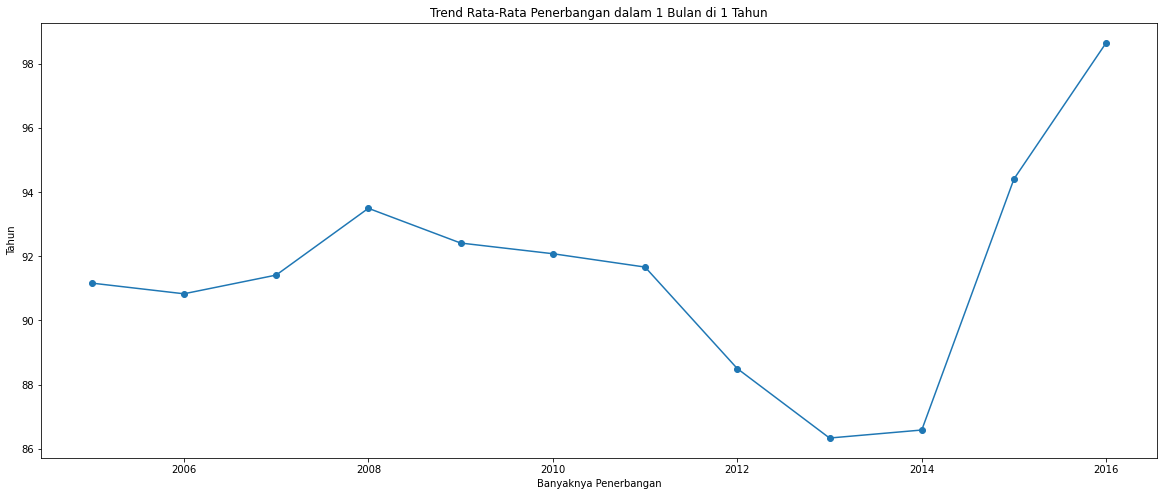

In [564]:
plt.figure(figsize=(20, 8))
plt.plot(
   just_year,
   total_year_avg,
   marker='o',
)
plt.title('Average Trend of Flights in 1 Month in 1 Year')
plt.ylabel('Year')
plt.xlabel('Number of Flights')
plt.show()

In [565]:
fig = go.Figure(data=[go.Table(header=dict(values=['Tahun', 'Bulan', 'Jumlah Penerbangan']),
                 cells=dict(values=[tahun, bulan, total]))])
fig.show()

In [566]:
# Adjust the size of the list
idx = -1
for i in range(len(tahun)):
    if total[i] != 0:
        idx = i
        break

tahun = tahun[idx:]
bulan = bulan[idx:]
total = total[idx:]

idx = len(tahun)
for i in range(len(tahun)-1, -1, -1):
    if total[i] != 0:
        idx = i
        break

tahun = tahun[:idx + 1]
bulan = bulan[:idx + 1]
total = total[:idx + 1]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


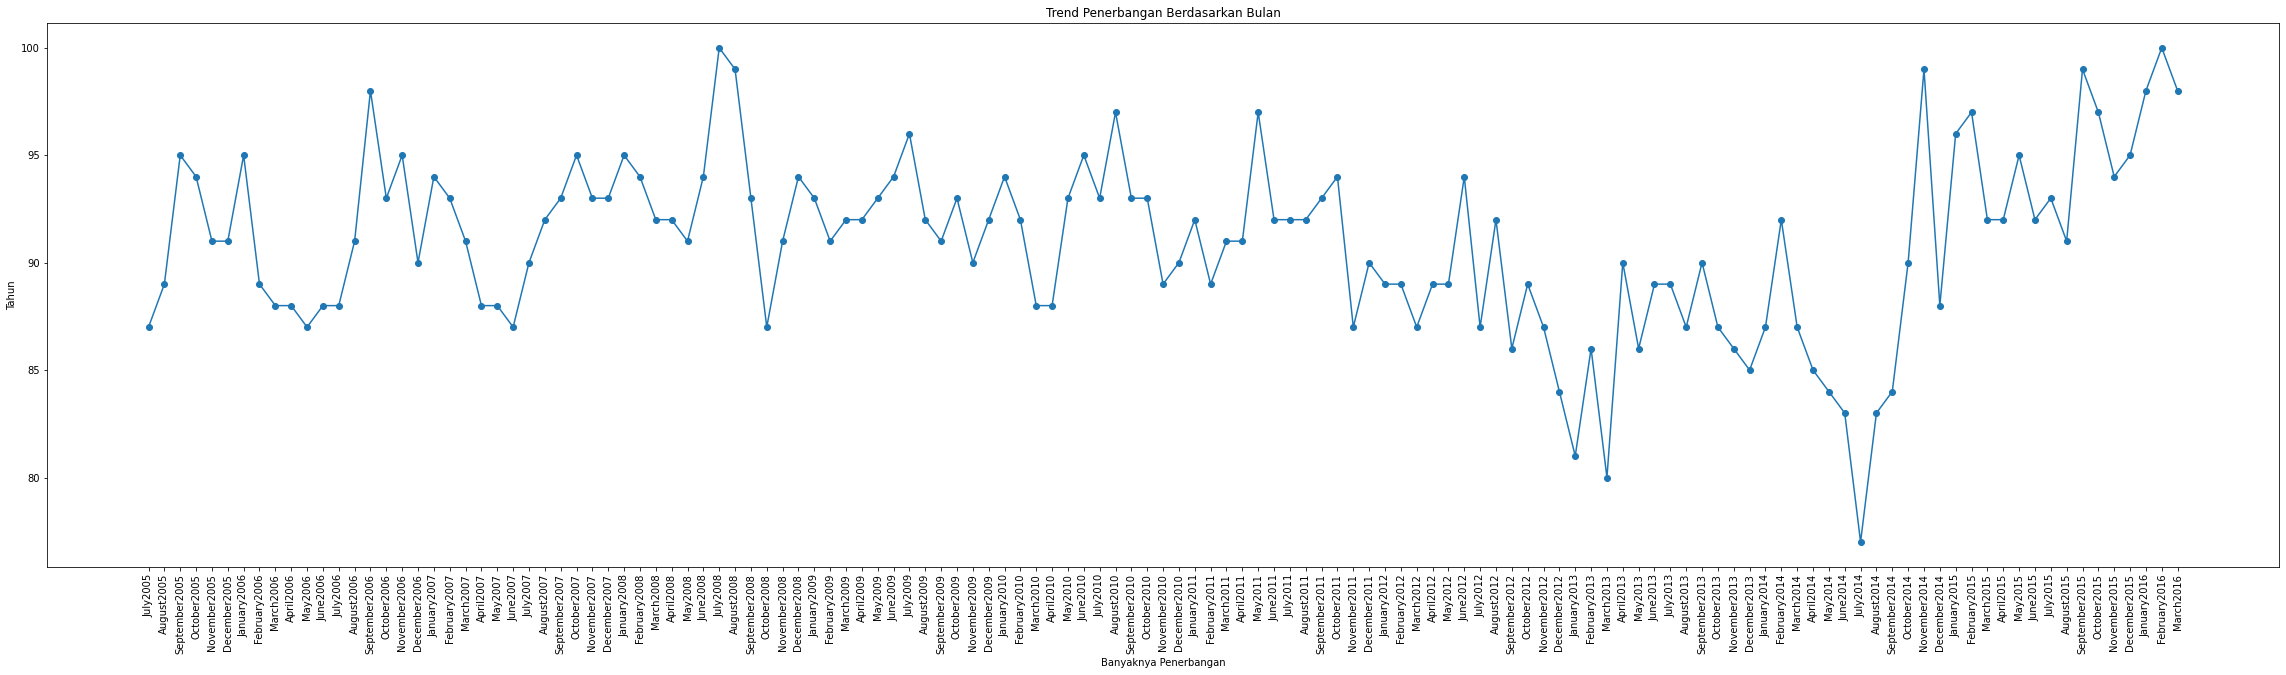

In [567]:
month_year = [month[i] + str(year[i]) for i in range(len(year))]

plt.figure(figsize=(40, 10))
plt.plot(
   year_month,
   total,
   marker='o',
)
plt.xticks(rotation=90)
plt.title('Flight Trends by Month')
plt.ylabel('Year')
plt.xlabel('Number of Flights')
plt.show()

In [568]:
list_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In the dataset, there is no data regarding traffic at the beginning of 2005 and at the end of 2016.
Trends in air traffic based on average flights each year are as follows:

* There was a significant increase in the period from 2007 to 2008.
* Since 2008, there has been a decline in the number of flights until 2013, where the greatest decline occurred from 2011 to 2012 and from 2012 to 2013.
* The largest increase in the number of flights occurred in the period 2014 to 2015. From 2015 to 2016 there was also an increase in the average number of flights.

### The features that can influence price category features and its relation

In [569]:
df_encode = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/air_traffic_data.csv', encoding='latin-1')
col = df_encode.select_dtypes(include=["object"]).columns

for c in col:
  le = LabelEncoder() 
  le.fit(list(df_encode[c].values)) 
  df_encode[c] = le.transform(list(df_encode[c].values))

display(df_encode.describe())

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
count,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,43.743586,40.890251,37.618711,36.544946,0.613714,4.438995,0.590125,0.872060,1.089691,2.652829,29240.521090,0.590125,29331.917105,2010.385220,5.531352
std,313.336196,23.667810,20.459135,21.167928,18.891945,0.486914,3.240626,0.603748,0.334034,1.495813,2.544096,58319.509284,0.603748,58284.182219,3.137589,3.454595
min,200507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2005.000000,0.000000
25%,200803.000000,24.000000,22.000000,19.000000,18.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5373.500000,0.000000,5495.500000,2008.000000,3.000000
50%,201011.000000,47.000000,47.000000,39.000000,40.000000,1.000000,4.000000,1.000000,1.000000,0.000000,2.000000,9210.000000,1.000000,9354.000000,2010.000000,5.000000
75%,201308.000000,69.000000,61.000000,60.000000,55.000000,1.000000,8.000000,1.000000,1.000000,2.000000,6.000000,21158.500000,1.000000,21182.000000,2013.000000,9.000000
max,201603.000000,76.000000,73.000000,67.000000,64.000000,1.000000,8.000000,2.000000,1.000000,4.000000,7.000000,659837.000000,2.000000,659837.000000,2016.000000,11.000000


In [570]:
df_encode.corr()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
Activity Period,1.000000,0.008180,-0.037839,0.009663,-0.005533,0.066100,-0.028145,-0.052450,-0.005754,-0.088284,-0.005123,0.060311,-0.052450,0.059336,0.999940,-0.027142
Operating Airline,0.008180,1.000000,0.834608,0.968828,0.828748,-0.130956,0.151120,0.100644,-0.096112,0.197959,0.251975,0.185424,0.100644,0.186427,0.008183,-0.000452
Operating Airline IATA Code,-0.037839,0.834608,1.000000,0.801170,0.918496,-0.141793,0.111533,0.097914,-0.113208,0.199623,0.271075,0.116118,0.097914,0.117024,-0.037765,-0.001417
Published Airline,0.009663,0.968828,0.801170,1.000000,0.870530,-0.083020,0.108379,0.098414,-0.095284,0.199894,0.275990,0.200862,0.098414,0.201890,0.009641,0.000609
Published Airline IATA Code,-0.005533,0.828748,0.918496,0.870530,1.000000,-0.036693,0.018233,0.096285,-0.125693,0.159585,0.304370,0.149691,0.096285,0.150640,-0.005523,-0.000475
GEO Summary,0.066100,-0.130956,-0.141793,-0.083020,-0.036693,1.000000,-0.871826,-0.026760,0.411498,-0.574422,0.109553,-0.395743,-0.026760,-0.396856,0.066046,-0.001139
GEO Region,-0.028145,0.151120,0.111533,0.108379,0.018233,-0.871826,1.000000,0.033899,-0.382864,0.509119,-0.121033,0.336113,0.033899,0.336980,-0.028129,0.000949
Activity Type Code,-0.052450,0.100644,0.097914,0.098414,0.096285,-0.026760,0.033899,1.000000,0.001004,0.087788,0.087706,-0.071423,1.000000,-0.067804,-0.052364,-0.001523
Price Category Code,-0.005754,-0.096112,-0.113208,-0.095284,-0.125693,0.411498,-0.382864,0.001004,1.000000,-0.102936,0.213485,-0.065047,0.001004,-0.064661,-0.005683,-0.003627
Terminal,-0.088284,0.197959,0.199623,0.199894,0.159585,-0.574422,0.509119,0.087788,-0.102936,1.000000,0.168414,0.429146,0.087788,0.430687,-0.088155,-0.000093


Among all the existing features, GEO Region is the feature that most influences the price category. This can be seen from the correlation value between Price Category Code and GEO Region, which is the highest correlation value. The correlation value between these two features is positive, which means that the higher the GEO Region value, the higher the Price Category Code value, and vice versa.

### Hypothesis of a new engineered feature that might affect the price category features

In [571]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,201603,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,17521,Enplaned,17521,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [572]:
newest_df = df.copy()
ha = []

for index, row in newest_df.iterrows():
  konkat = row['GEO Summary'] + " " + row['Boarding Area']
  ha.append(konkat)

newest_df['konkat'] = ha

In [573]:
col = ['konkat', 'Price Category Code']

for c in col:
  le = LabelEncoder() 
  le.fit(list(newest_df[c].values)) 
  newest_df[c] = le.transform(list(newest_df[c].values))

In [574]:
newest_df.corr()

,Activity Period,Price Category Code,Passenger Count,Adjusted Passenger Count,Year,konkat
Activity Period,1.000000,0.012764,0.065190,0.052764,0.999939,0.082342
Price Category Code,0.012764,1.000000,0.003709,0.007925,0.012838,0.480229
Passenger Count,0.065190,0.003709,1.000000,0.992913,0.064960,0.092559
Adjusted Passenger Count,0.052764,0.007925,0.992913,1.000000,0.052555,0.086409
Year,0.999939,0.012838,0.064960,0.052555,1.000000,0.082286
konkat,0.082342,0.480229,0.092559,0.086409,0.082286,1.000000


### Dividing air traffic into clusters based on certain divisions

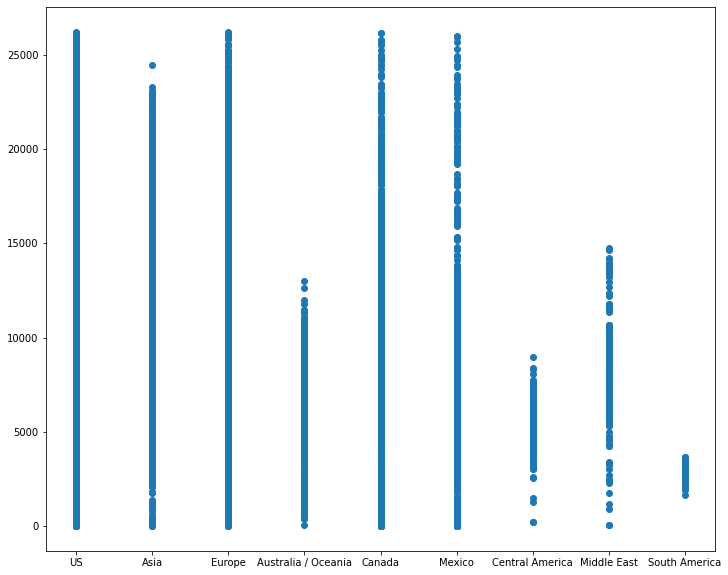

In [575]:
plt.figure(figsize=(12, 10))
plt.scatter(df['GEO Region'], df['Adjusted Passenger Count'])
plt.show()

Based on the graph above, we get 9 clusters based on GEO Region where each cluster has a different range of Adjusted Passenger Count values. Where each cluster provides information about the number of passengers in a particular region. Based on the graph, flights with GEO Region US and Europe have the largest distribution of passengers and flights with GEO Region South America have the smallest distribution of passengers.

### A price category prediction model with variables that can influence the price category

In [576]:
newest_nomor_6 = newest_df.copy()

le = LabelEncoder() 
le.fit(list(newest_nomor_6['GEO Region'].values)) 
newest_nomor_6['GEO Region'] = le.transform(list(newest_nomor_6['GEO Region'].values))

In [577]:
df_target_nomor_6 = newest_nomor_6['Price Category Code']
newest_nomor_6_feature = newest_nomor_6[['GEO Region', 'konkat']]

x_train, x_test, y_train, y_test = train_test_split(newest_nomor_6_feature, df_target_nomor_6, test_size=0.2)

In [578]:
grid_params = {'C': [0.01, 0.1, 1.0, 10], 'class_weight': [{1: 1, 0: 10}]}

clf = GridSearchCV(SVC(), grid_params)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print()
print("F1-score :", f1_score(y_test, y_pred, average="weighted"))
print("Precision score:", precision_score(y_test, y_pred, average="weighted"))
print("Recall score :", recall_score(y_test, y_pred, average="weighted"))

Nilai akurasi: 0.8739352640545145

F1-score       : 0.8898635082990043
Precision score: 0.9259489694179897
Recall score   : 0.8739352640545145


### Create a price category prediction model by utilizing dimensionality reduction!

In [579]:
df_pca = df

In [580]:
df_pca.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [581]:
df_pca = df_pca.drop(['Price Category Code'], axis = 1)

col = df_pca.select_dtypes(include=["object"]).columns

for c in col:
  le = LabelEncoder() 
  le.fit(list(df_pca[c].values)) 
  df_pca[c] = le.transform(list(df_pca[c].values))

for cols in df_pca.columns:
  df_pca[cols] = (df_pca[cols] - df_pca[cols].min()) / (df_pca[cols].max() - df_pca[cols].min())

In [582]:
arr_df_pca = df_pca.to_numpy()
arr_target = pd.DataFrame(df['Price Category Code']).to_numpy()
arr_df_pca_done=np.concatenate((arr_df_pca, arr_target), axis=1)
df_pca_done = pd.DataFrame(arr_df_pca_done)

df_pca_done.columns = ['Activity Period', 'Operating Airline', 
                       'Operating Airline IATA Code', 'Published Airline',
                       'Published Airline IATA Code', 'GEO Summary',
                       'GEO Region', 'Activity Type Code','Terminal', 
                       'Boarding Area', 'Passenger Count', 
                       'Adjusted Activity Type Code', 'Adjusted Passenger Count',
                       'Year', 'Month', 'Price Category Code']
df_pca_done.describe()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Price Category Code
count,11736.000000,11736.00,11736.000000,11736.000000,11736.000000,11736.0,11736.0,11736.0,11736.0,11736.0,11736.000000,11736.0,11736.000000,11736.000000,11736.0,11736
unique,129.000000,76.00,76.000000,68.000000,68.000000,2.0,9.0,3.0,5.0,8.0,8475.000000,3.0,8478.000000,12.000000,12.0,2
top,0.273723,0.92,0.853333,0.910448,0.880597,1.0,0.0,0.0,0.0,0.0,0.000038,0.0,0.000038,0.909091,1.0,Other
freq,100.000000,1523.00,1960.000000,1798.000000,2362.000000,8746.0,3015.0,5437.0,8405.0,4921.0,11.000000,5437.0,10.000000,1133.000000,1015.0,10537


In [583]:
for col in df_pca_done:
  if col == 'Price Category Code':
    continue
  df_pca_done[col] = df_pca_done[col].astype('int')

In [584]:
df_pca_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11736 entries, 0 to 11735
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              11736 non-null  int64 
 1   Operating Airline            11736 non-null  int64 
 2   Operating Airline IATA Code  11736 non-null  int64 
 3   Published Airline            11736 non-null  int64 
 4   Published Airline IATA Code  11736 non-null  int64 
 5   GEO Summary                  11736 non-null  int64 
 6   GEO Region                   11736 non-null  int64 
 7   Activity Type Code           11736 non-null  int64 
 8   Terminal                     11736 non-null  int64 
 9   Boarding Area                11736 non-null  int64 
 10  Passenger Count              11736 non-null  int64 
 11  Adjusted Activity Type Code  11736 non-null  int64 
 12  Adjusted Passenger Count     11736 non-null  int64 
 13  Year                         11

In [585]:
X = df_pca_done.iloc[:,0:15].values
y = df_pca_done.iloc[:,15].values

mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec))/(X.shape[0]-1)

cov_mat = np.cov(X.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

eig_pairs = [(np. abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 

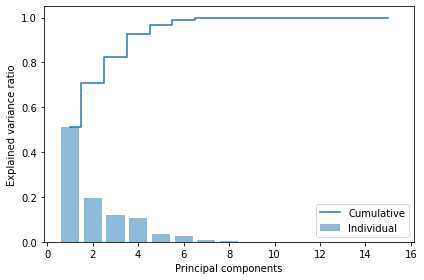

[0.51201607 0.70695067 0.82465569 0.92896691 0.9656591  0.98961634
 0.99609455 0.99910163 0.99955097 1.         1.         1.
 1.         1.         1.        ]


In [586]:
tot = sum(np.abs(eig_vals)) 
var_exp = [(i / tot) for i in sorted(np.abs(eig_vals), reverse=True)] 
cum_var_exp = np.cumsum(var_exp) 

plt.bar(range(1, eig_vals.size + 1), var_exp, alpha=0.5, align='center', label='Individual') 
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label='Cumulative') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

#Pengaruh fitur terhadap akurasi data
print(cum_var_exp)

In [587]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
principalDf.head()

,PC 1,PC 2,PC 3,PC 4
0,1.208398,0.972799,-0.645489,-0.08545
1,-0.382984,-0.079100,-0.045277,-0.08318
2,-0.382984,-0.079100,-0.045277,-0.08318
3,-0.382984,-0.079100,-0.045277,-0.08318
4,-0.382984,-0.079100,-0.045277,-0.08318


In [588]:
df_feature = principalDf
df_target = df['Price Category Code']
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.2)

In [589]:
grid_params = {'C': [0.001, 0.01, 0.1, 1.0, 10, 100], 'kernel': ['poly', 'rbf'], 'class_weight': [{'Other': 1, 'Low Fare ':10}]}

clf = GridSearchCV(SVC(), grid_params)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print()
print("F1-score :", f1_score(y_test, y_pred, average="weighted"))
print("Precision score:", precision_score(y_test, y_pred, average="weighted"))
print("Recall score :", recall_score(y_test, y_pred, average="weighted"))

Nilai akurasi: 0.862862010221465

F1-score       : 0.8808071959155224
Precision score: 0.9196057052009586
Recall score   : 0.862862010221465


### Comparing performances of Cost-Sensitive SVM model andPCA model.

Model performance will be compared using Weighted Average. The model that uses the GEO Region feature along with the engineered feature in number 4 gets the following evaluation results:
F1-score: 0.8898635082990043
Precision score: 0.9259489694179897
Recall score: 0.8739352640545145
Meanwhile, the model that uses PCA gets the following evaluation results:
F1-score: 0.8808071959155224
Precision score: 0.9196057052009586
Recall score: 0.862862010221465
  
From these results, it was found that the model that uses the GEO Region feature and the engineered feature in number 4 works slightly better than the model that uses PCA.-

### Predict adjusted passenger count

In [590]:
df2 = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/air_traffic_data.csv', encoding='latin-1')

col = df2.select_dtypes(include=["object"]).columns

for c in col:
  le = LabelEncoder() 
  le.fit(list(df2[c].values)) 
  df2[c] = le.transform(list(df2[c].values))

df2.corr()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
Activity Period,1.000000,0.008180,-0.037839,0.009663,-0.005533,0.066100,-0.028145,-0.052450,-0.005754,-0.088284,-0.005123,0.060311,-0.052450,0.059336,0.999940,-0.027142
Operating Airline,0.008180,1.000000,0.834608,0.968828,0.828748,-0.130956,0.151120,0.100644,-0.096112,0.197959,0.251975,0.185424,0.100644,0.186427,0.008183,-0.000452
Operating Airline IATA Code,-0.037839,0.834608,1.000000,0.801170,0.918496,-0.141793,0.111533,0.097914,-0.113208,0.199623,0.271075,0.116118,0.097914,0.117024,-0.037765,-0.001417
Published Airline,0.009663,0.968828,0.801170,1.000000,0.870530,-0.083020,0.108379,0.098414,-0.095284,0.199894,0.275990,0.200862,0.098414,0.201890,0.009641,0.000609
Published Airline IATA Code,-0.005533,0.828748,0.918496,0.870530,1.000000,-0.036693,0.018233,0.096285,-0.125693,0.159585,0.304370,0.149691,0.096285,0.150640,-0.005523,-0.000475
GEO Summary,0.066100,-0.130956,-0.141793,-0.083020,-0.036693,1.000000,-0.871826,-0.026760,0.411498,-0.574422,0.109553,-0.395743,-0.026760,-0.396856,0.066046,-0.001139
GEO Region,-0.028145,0.151120,0.111533,0.108379,0.018233,-0.871826,1.000000,0.033899,-0.382864,0.509119,-0.121033,0.336113,0.033899,0.336980,-0.028129,0.000949
Activity Type Code,-0.052450,0.100644,0.097914,0.098414,0.096285,-0.026760,0.033899,1.000000,0.001004,0.087788,0.087706,-0.071423,1.000000,-0.067804,-0.052364,-0.001523
Price Category Code,-0.005754,-0.096112,-0.113208,-0.095284,-0.125693,0.411498,-0.382864,0.001004,1.000000,-0.102936,0.213485,-0.065047,0.001004,-0.064661,-0.005683,-0.003627
Terminal,-0.088284,0.197959,0.199623,0.199894,0.159585,-0.574422,0.509119,0.087788,-0.102936,1.000000,0.168414,0.429146,0.087788,0.430687,-0.088155,-0.000093


In [591]:
del df2["Month"]
del df2["Year"]
del df2["Activity Period"]
del df2["Boarding Area"]
del df2["Price Category Code"]
del df2["Operating Airline"]
del df2["Operating Airline IATA Code"]
del df2["Published Airline"]
del df2["Published Airline IATA Code"]
del df2["Activity Type Code"]
del df2["Adjusted Activity Type Code"]
df2.corr()

,GEO Summary,GEO Region,Terminal,Passenger Count,Adjusted Passenger Count
GEO Summary,1.000000,-0.871826,-0.574422,-0.395743,-0.396856
GEO Region,-0.871826,1.000000,0.509119,0.336113,0.336980
Terminal,-0.574422,0.509119,1.000000,0.429146,0.430687
Passenger Count,-0.395743,0.336113,0.429146,1.000000,0.999941
Adjusted Passenger Count,-0.396856,0.336980,0.430687,0.999941,1.000000


In [592]:
target = df2.copy()["Adjusted Passenger Count"]

del df2["Adjusted Passenger Count"]
feature = df2.copy()

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

In [593]:
grid_params = {'normalize':[True, False]}

linreg = GridSearchCV(LinearRegression(), grid_params)
linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 441037.3628554441
R2 Score: 0.9998813908622975
